In [1]:
import pandas as pd

#taking csv file
fifa_data=pd.read_csv('FIFA.csv', index_col=0)
fifa_data.describe()

,ID,Age,OVA,BOV,POT,Height,Weight,Growth,Value,Wage,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,1.269100e+04,12691.000000,...,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000,12691.000000
mean,218293.957608,25.685210,68.040028,68.954377,72.788512,68.985265,166.088094,4.748483,3.080831e+06,12856.906469,...,15.312426,15.515011,1663.795524,367.198566,68.504137,55.991648,59.985344,65.238752,51.453156,66.025530
std,31213.308460,4.588207,6.388843,6.188378,5.715754,5.367710,15.816589,5.194705,6.024472e+06,23216.125992,...,16.332639,17.051911,248.063905,38.226693,11.316858,13.690071,9.855574,9.514381,16.822526,9.349647
min,16.000000,16.000000,47.000000,47.000000,47.000000,61.000000,110.000000,0.000000,1.500000e+04,1000.000000,...,2.000000,2.000000,772.000000,239.000000,26.000000,16.000000,25.000000,28.000000,15.000000,28.000000
25%,202425.000000,22.000000,64.000000,65.000000,69.000000,61.000000,154.000000,0.000000,5.000000e+05,2000.000000,...,8.000000,8.000000,1532.000000,341.000000,63.000000,47.000000,54.000000,60.000000,36.000000,60.000000
50%,224890.000000,25.000000,68.000000,69.000000,73.000000,69.000000,165.000000,3.000000,9.750000e+05,5000.000000,...,11.000000,11.000000,1693.000000,368.000000,69.000000,59.000000,61.000000,66.000000,55.000000,67.000000
75%,240322.500000,29.000000,72.000000,73.000000,76.000000,73.000000,176.000000,8.000000,3.100000e+06,14000.000000,...,14.000000,14.000000,1833.000000,393.000000,76.000000,66.000000,67.000000,71.000000,65.000000,73.000000
max,259105.000000,42.000000,93.000000,93.000000,95.000000,81.000000,243.000000,26.000000,1.055000e+08,560000.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [2]:
import numpy as np
import pandas as pd

# making groups of all positions based on their category
conditions = [
    (fifa_data['BP'] == 'RF') | (fifa_data['BP'] == 'ST') | (fifa_data['BP'] == 'LW') | (fifa_data['BP'] == 'LF') | (fifa_data['BP'] == 'RS') | (fifa_data['BP'] == 'LS') | (fifa_data['BP'] == 'RW') | (fifa_data['BP'] == 'CF')
    ,(fifa_data['BP'] == 'RCM') | (fifa_data['BP'] == 'LCM') | (fifa_data['BP'] == 'LDM') | (fifa_data['BP'] == 'CAM') | (fifa_data['BP'] == 'CDM') | (fifa_data['BP'] == 'RM') | (fifa_data['BP'] == 'LAM') | (fifa_data['BP'] == 'LM') | (fifa_data['BP'] == 'RDM') | (fifa_data['BP'] == 'CM') | (fifa_data['BP'] == 'RAM')
    ,(fifa_data['BP'] == 'RCB') | (fifa_data['BP'] == 'CB') | (fifa_data['BP'] == 'LCB') | (fifa_data['BP'] == 'LB') | (fifa_data['BP'] == 'RB') | (fifa_data['BP'] == 'LWB') | (fifa_data['BP'] == 'RWB')
    ,(fifa_data['BP'] == 'GK')]

choices = ['FW','MID','DEF',"GK"]
fifa_data['GPOS'] = np.select(conditions, choices, default='N/A')
fifa_data['GPOS']

1        MID
4        MID
6        MID
26        GK
41        GK
        ... 
17119     GK
17121    MID
17122    DEF
17123    DEF
17124     FW
Name: GPOS, Length: 12691, dtype: object

In [3]:
#Encoding GPOS
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'GPOS'. 
fifa_data['GPOS']= label_encoder.fit_transform(fifa_data['GPOS']) 
  
fifa_data['GPOS'].unique()

array([3, 2, 0, 1])

In [4]:
#Inverse the encoding
label_encoder.inverse_transform(fifa_data.GPOS)

array(['MID', 'MID', 'MID', ..., 'DEF', 'DEF', 'FW'], dtype=object)

In [5]:
#calculating BMI of each player
import math
fifa_data['BMI'] = fifa_data.Weight*0.453592/pow((fifa_data.Height*2.54)/100,2)
fifa_data['BMI'].head()

1     27.019314
4     23.493061
6     24.902645
26    24.709662
41    23.458746
Name: BMI, dtype: float64

In [6]:
#modelling -feature selction

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

df = fifa_data.copy()

In [7]:
#dropping unnecessary columns
categorical = ['Nationality', 'Club', 'foot','A/W','D/W','W/F','BP','SM','IR']

for item in categorical:
    df[item] = df[item].fillna('0') 
    le = preprocessing.LabelEncoder()
    df[item] = le.fit_transform(df[item])
    
drop = ['ID', 'Name', 'Player Photo','POT', 'Club Logo', 'Flag Photo','Team & Contract','Contract' , 'Position', 'BOV',
        'Release Clause','Wage',#'Growth',
        'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF','RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 
        'CDM','RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','GK',#'PAC' ,
        'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Total Stats','Base Stats','Skill','GPOS', 'BMI','Nationality','Club','BP',
        'Height','Weight','foot','Balance','Jumping','Strength','Interceptions','Defending','Marking','Standing Tackle',
        'Sliding Tackle','Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes','W/F','A/W','D/W']

df = df.drop(drop, axis=1)

In [8]:
#PCA (Principal Component Analysis) & Clustering
fifacluster=fifa_data[["Attacking","Crossing","Finishing","Heading Accuracy","Short Passing","Volleys","Skill","Dribbling",
                       "Curve","FK Accuracy","Long Passing","Ball Control","Movement","Acceleration","Sprint Speed","Agility",
                       "Reactions","Balance","Power","Shot Power","Jumping","Stamina","Strength","Long Shots","Mentality",
                       "Aggression","Interceptions","Positioning","Vision","Penalties","Composure","Defending","Marking",
                       "Standing Tackle","Sliding Tackle","Goalkeeping","GK Diving","GK Handling","GK Kicking","GK Positioning",
                       "GK Reflexes","GPOS"]]
fifacluster.head()

,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,...,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,GPOS
1,337,68,64,61,76,68.0,369,69,79.0,79,...,70,43,40.0,56,9,12,13,11,11,3
4,367,75,69,54,90,79.0,408,85,80.0,70,...,68,57,56.0,45,6,13,6,13,7,3
6,342,80,66,43,84,69.0,406,77,83.0,80,...,65,65,60.0,47,7,11,7,14,8,3
26,95,13,15,13,37,17.0,122,26,20.0,13,...,13,11,11.0,396,77,76,74,91,78,2
41,93,18,11,14,39,11.0,106,12,13.0,13,...,9,15,14.0,355,69,71,72,73,70,2


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(fifacluster[fifacluster.columns[~fifacluster.columns.isin(['GPOS'])]])

# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,-138.833440,17.891385
1,-194.918146,19.972204
2,-188.461800,-7.079458
3,452.539890,69.273177
4,465.567062,32.104863


<Figure size 432x288 with 0 Axes>

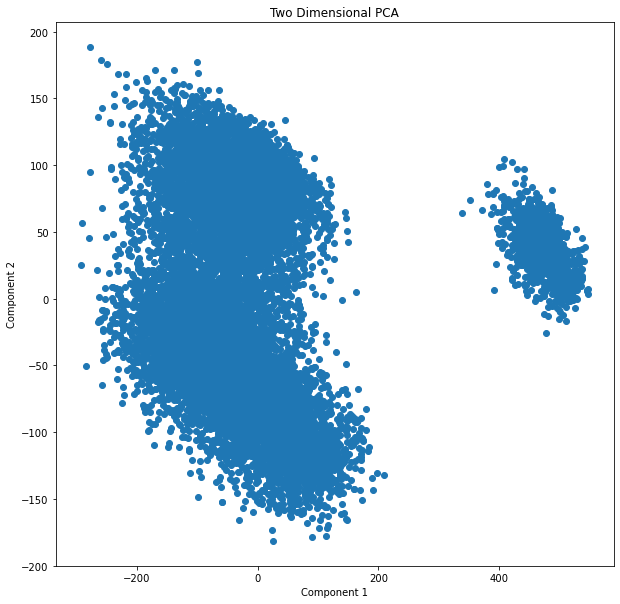

In [10]:
#Analyzing PCA component sizes
import matplotlib.pyplot as plt

principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

# Visualizing PCA in 2 Dimensions.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Two Dimensional PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2']
            #, c = y_kmeans, s=10
           )
plt.show()

In [11]:
#normal clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

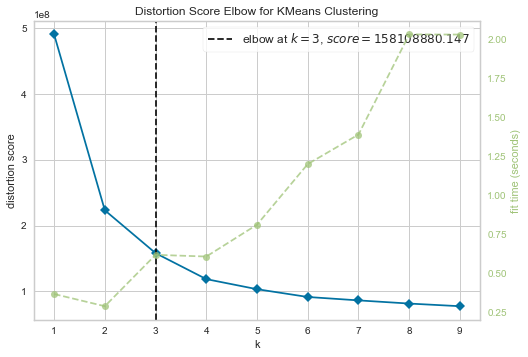

In [13]:
#Elbow for KMean Clustering
model = KMeans()
fig = KElbowVisualizer(model,k=(1,10))
fig.fit(fifacluster[fifacluster.columns[~fifacluster.columns.isin(['GPOS','BMI','eGPOS'])]])
fig.show();

In [14]:
#Clustering
fifacluster['principal component 1'] = principal_component1
fifacluster['principal component 2'] = principal_component2
fifacluster['cluster'] = y_kmeans

<ipython-input-14-bef39e13e6e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifacluster['principal component 1'] = principal_component1
<ipython-input-14-bef39e13e6e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifacluster['principal component 2'] = principal_component2
<ipython-input-14-bef39e13e6e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

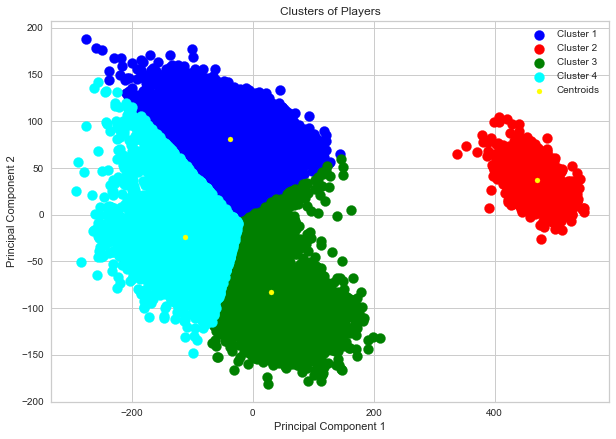

In [15]:
#Visualizing K-Means
from matplotlib import colors as mcolors

plt.figure(figsize=(10,7))
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(principalComponents1[y_kmeans == 5, 0], principalComponents1[y_kmeans == 5, 1], s = 100, c = 'limegreen', label = 'Cluster 6')
#plt.scatter(principalComponents1[y_kmeans == 6, 0], principalComponents1[y_kmeans == 6, 1], s = 100, c = 'silver', label = 'Cluster 7')
#plt.scatter(principalComponents1[y_kmeans == 7, 0], principalComponents1[y_kmeans == 7, 1], s = 100, c = 'rosybrown', label = 'Cluster 8')
#plt.scatter(principalComponents1[y_kmeans == 8, 0], principalComponents1[y_kmeans == 8, 1], s = 100, c = 'mediumpurple', label = 'Cluster 9')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Players')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

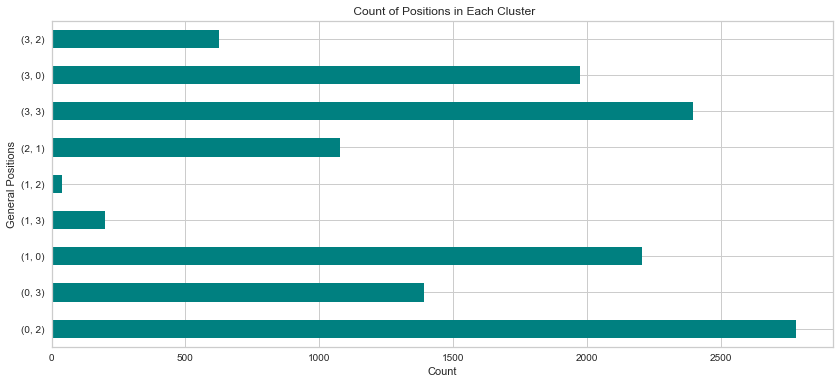

In [16]:
#Detailed Analysis
fifacluster.groupby("GPOS")["cluster"].value_counts().plot(kind="barh",color="teal",figsize=(14,6))
plt.ylabel('General Positions')
plt.xlabel('Count')
plt.title(' Count of Positions in Each Cluster')
plt.show()

In [17]:
pd.crosstab( index=fifacluster['cluster'],columns=fifacluster['GPOS'])

GPOS,0,1,2,3
cluster,,,,
0,0,2207,0,1975
1,0,0,1077,0
2,2781,39,0,627
3,1390,198,0,2397


In [18]:
#Normalizing Value
target = np.log1p(df['Value'])
original_target = df['Value']
df = df.drop(['Value'], axis=1)

In [19]:
#Train/ Test Split

scaler=MinMaxScaler()

X = df.copy()

y = target.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=99,shuffle=True)

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [20]:
#Linear Regression
reg = LinearRegression()

reg.fit(X_train,y_train)

pred = reg.predict(X_train)

scores = cross_val_score(reg,X,y)
 
pred_1 = reg.predict(X_test)

respred=(np.expm1(pred_1))
restrue=(np.expm1(y_test))


#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
#Real value MAPE
LR_MAPE= MAPE(y_test,pred_1)

print('MAPE:', '{:0.3f}'.format(LR_MAPE)+'%')
print('Train r2 Score:','{:0.3f}'.format(reg.score(X_train, y_train)*100)+'%')
print('Test r2 Score:','{:0.3f}'.format(reg.score(X_test, y_test)*100))
print('Adjusted r2 Score:','{:0.3f}'.format((1-((1-reg.score(X_test, y_test)*100)*((4188-1))/(4188-35-1))))+'%')
#print('MSE:', mean_squared_error(y_true=restrue, y_pred=respred,squared=True))
print('RMSE:', mean_squared_error(restrue, respred,squared=False))
print('MAE:', mean_absolute_error(restrue, respred))

respred=np.array(np.expm1(pred_1)).reshape(-1,1)
restrue=np.array(np.expm1(y_test)).reshape(-1,1)
print('Cross Validation Score:','{:0.3f}'.format(cross_val_score(reg,restrue,respred,cv=2).mean()*100)+'%')

MAPE: 1.274%
Train r2 Score: 96.791%
Test r2 Score: 96.688
Adjusted r2 Score: 97.494%
RMSE: 3570337.072269527
MAE: 716693.0674474062
Cross Validation Score: 91.488%


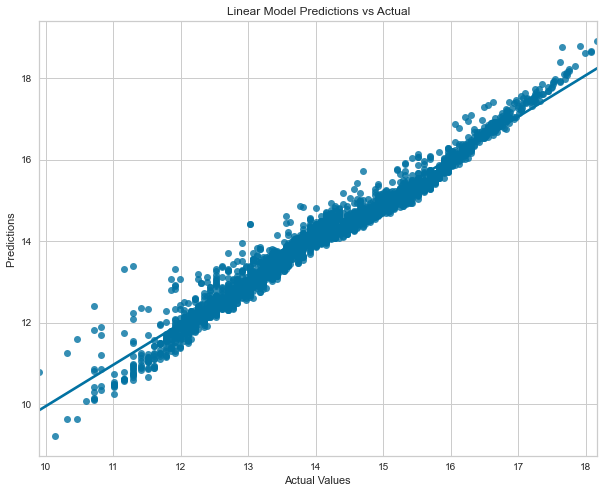

In [21]:
import  seaborn as sns 

plt.figure(figsize=(10,8))
sns.regplot(x=y_test, y=pred_1)
plt.xlabel('Actual Values ')
plt.ylabel('Predictions ')
plt.title('Linear Model Predictions vs Actual')
plt.show()

In [22]:
#Random Forest Regression
random = RandomForestRegressor()

random.fit(X_train, y_train)

y_pred = random.predict(X_test)

In [23]:
RF_MAPE= MAPE((y_test),(y_pred))

y_pred1=np.array(np.expm1(y_pred)).reshape(-1,1)
y_test1=np.array(np.expm1(y_test)).reshape(-1,1)

cvs=cross_val_score(random,y_test1,y_pred1).mean()

print('Train r2 Score:',random.score(X_train, y_train))
print('Test r2 Score:',random.score(X_test, y_test))
print('Adjusted r2 Score:',(1-((1-random.score(X_test, y_test))*((4188-1))/(4188-35-1))))
#print('MSE:', mean_squared_error(y_true=y_test1, y_pred=y_pred1,squared=True))
print('RMSE:', mean_squared_error(y_true=y_test1, y_pred=y_pred1,squared=False))
print('MAE:', mean_absolute_error(y_test1, y_pred1))
print('MAPE:', RF_MAPE)
print('Cross Validation Score:',cvs)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Train r2 Score: 0.9993392382108369
Test r2 Score: 0.9886783084730193
Adjusted r2 Score: 0.9885828703219007
RMSE: 1022424.3559992358
MAE: 269280.2727405544
MAPE: 0.6064695930743881
Cross Validation Score: 0.975968307511755


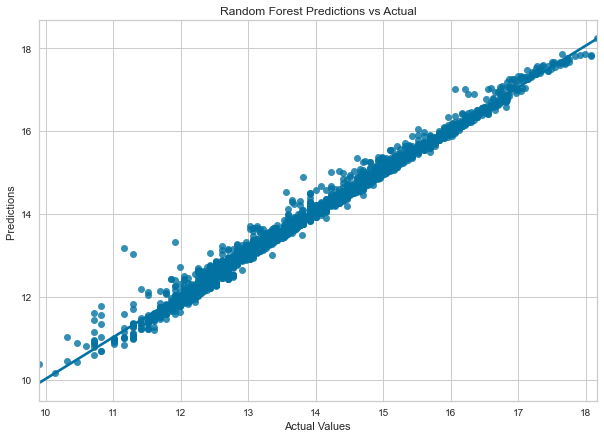

In [24]:
plt.figure(figsize=(10,7))

sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values ')
plt.ylabel('Predictions ')
plt.title('Random Forest Predictions vs Actual')
plt.show()

In [25]:
importances = random.feature_importances_
importances

array([7.34294732e-02, 9.02897135e-01, 1.33150246e-02, 5.10415296e-04,
       1.48163696e-04, 1.60927371e-03, 2.12154367e-04, 1.96371219e-04,
       6.33745031e-04, 4.62364165e-04, 2.17851531e-04, 1.93802785e-04,
       1.94887223e-04, 5.90812136e-04, 1.84084912e-04, 1.66768450e-04,
       1.98602454e-04, 1.80382125e-04, 2.85858058e-04, 3.97457322e-04,
       7.55735535e-04, 2.26975317e-04, 3.72815176e-04, 1.94421490e-04,
       2.38487590e-04, 7.83277530e-04, 2.99926388e-04, 5.29545026e-04,
       2.54767935e-04, 5.93324147e-05, 4.01320358e-05, 2.19956535e-04])

In [26]:
features = df.columns
imp = pd.DataFrame({'Features': features, 'Importance': importances})
imp.sort_values(by='Importance',ascending=False)

,Features,Importance
1,OVA,0.902897
0,Age,0.073429
2,Growth,0.013315
5,Finishing,0.001609
25,Positioning,0.000783
20,Shot Power,0.000756
8,Volleys,0.000634
13,Ball Control,0.000591
27,Penalties,0.000530
3,Attacking,0.000510
